In [6]:
import matplotlib.pyplot as plt
import numpy as np
import paddle
from paddle.nn import Conv2D
from paddle.nn.initializer import Assign

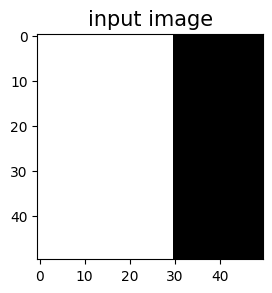

In [7]:
img = np.ones([50,50], dtype='float32')
img[:, 30:] = 0.
f = plt.subplot(121)
f.set_title('input image', fontsize=15)
plt.imshow(img, cmap='gray')

In [8]:
# 创建初始化权重参数w
w = np.array([1, 0, -1], dtype='float32')
# 将权重参数调整成维度为[cout, cin, kh, kw]的四维张量
w = w.reshape([1, 1, 1, 3])
# 创建卷积算子，设置输出通道数，卷积核大小，和初始化权重参数
# kernel_size = [1, 3]表示kh = 1, kw=3
# 创建卷积算子的时候，通过参数属性weight_attr指定参数初始化方式
# 这里的初始化方式时，从numpy.ndarray初始化卷积参数
conv = Conv2D(in_channels=1, out_channels=1, kernel_size=[1, 3],
       weight_attr=paddle.ParamAttr(
          initializer=Assign(value=w)))

In [9]:
x = img.reshape([1,1,50,50])
# 将numpy.ndarray转化成paddle中的tensor
x = paddle.to_tensor(x)
# 使用卷积算子作用在输入图片上
y = conv(x)
# 将输出tensor转化为numpy.ndarray
out = y.numpy()

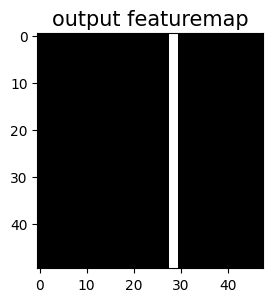

In [10]:
f = plt.subplot(122)
f.set_title('output featuremap', fontsize=15)
plt.imshow(out.squeeze(), cmap='gray')

In [11]:
# 查看卷积层的权重参数名字和数值
print(conv.weight)
# 参看卷积层的偏置参数名字和数值
print(conv.bias)

Parameter containing:
Tensor(shape=[1, 1, 1, 3], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [[[[ 1.,  0., -1.]]]])
Parameter containing:
Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [0.])
